# Rating Distribution
This part tries to describe the characteristics of movie rate in two sites and further explore the different rating level of different genres.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
douban_df = pd.read_csv("douban_movie_all.csv")
imdb_df = pd.read_csv(f"imdb_movie_all.csv")

In [2]:
douban_df.columns = ['Name', 'Year', 'Rate', 'Directors', 'Writers', 'Stars', 'Genres', 'Country', 'Language', 'Runtime']

In [3]:
rate_df = pd.DataFrame({'douban':douban_df['Rate'],'imdb':imdb_df['Rate']})
rate_df.describe()

,douban,imdb
count,250.000000,250.000000
mean,8.900800,8.303600
std,0.263433,0.223218
min,8.300000,8.000000
25%,8.700000,8.100000
50%,8.900000,8.200000
75%,9.100000,8.400000
max,9.700000,9.300000


<AxesSubplot:>

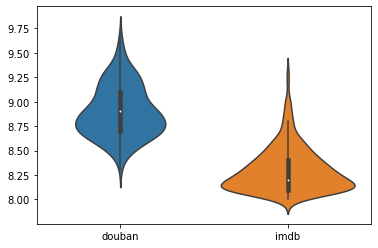

In [4]:
sns.violinplot(data=rate_df)

Comparing 2 sites' top250 movies, we can find that Douban users tend to give higher ratings than imdb users. The average rate of top250 movies in douban reach 8.9 while imdb's average rate is 8.3. An interesting example of rating level difference is that the movie wins the highest rate in both sites is \<The Shawshank Redempption\>, with 9.3 rate in imdb and 9.7 high score in douban. 
As shown in the violin plot, the rate distribution of imdb has higher peak and thin tail, while the douban's rate is more evenly distributed, which indicates the rating habits of two sites' users. Douban is a community with relatively more forgiving score givers and with a wider range of rate. So, if you are an imdb user and look up for movie recommendations in douban, it may be helpful to do some conversion of rate first (such as subtracting 0.4 point, from 8.8 to 8.4) to acquire reasonable inference of the movie quality.

In [7]:
# split genre tags of douban
douban_type = douban_df['Genres'].str.split('/')
douban_type = pd.DataFrame(douban_type.apply(pd.Series))
douban_new = pd.concat([douban_df,douban_type],axis=1)
douban_new.head()

,Name,Year,Rate,Directors,Writers,Stars,Genres,Country,Language,Runtime,0,1,2,3,4
0,肖申克的救赎,1994,9.7,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,剧情/犯罪,美国,英语,142分钟,剧情,犯罪,NaN,NaN,NaN
1,霸王别姬,1993,9.6,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,剧情/爱情/同性,中国大陆 / 中国香港,汉语普通话,171分钟,剧情,爱情,同性,NaN,NaN
2,阿甘正传,1994,9.5,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,剧情/爱情,美国,英语,142分钟,剧情,爱情,NaN,NaN,NaN
3,这个杀手不太冷,1994,9.4,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,剧情/动作/犯罪,法国 / 美国,英语 / 意大利语 / 法语,110分钟(剧场版),剧情,动作,犯罪,NaN,NaN
4,泰坦尼克号,1997,9.4,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,剧情/爱情/灾难,美国,英语 / 意大利语 / 德语 / 俄语,194分钟,剧情,爱情,灾难,NaN,NaN


In [8]:
# split genre tags of imdb
imdb_type = imdb_df['Genres'].str.split('/')
imdb_type = pd.DataFrame(imdb_type.apply(pd.Series))
imdb_new = pd.concat([imdb_df,imdb_type],axis=1)
imdb_new.head()

,Name,Year,Rate,Level,Directors,Writers,Stars,Genres,Runtime,Country,Language,Budget,Box_Office_USA,Box_Office_World,0,1,2,3,4,5
0,The Shawshank Redemption,1994,9.3,IIB,Frank Darabont,Stephen King/Frank Darabont,Tim Robbins/Morgan Freeman/Bob Gunton/See full...,Drama,142 min,USA,English,"$25,000,000","$28,699,976","$28,817,291",Drama,NaN,NaN,NaN,NaN,NaN
1,The Godfather,1972,9.2,IIB,Francis Ford Coppola,Mario Puzo/Francis Ford Coppola/1 more credit,Marlon Brando/Al Pacino/James Caan/See full ca...,Crime/Drama,175 min,USA,English/Italian/Latin,"$6,000,000","$134,966,411","$246,120,986",Crime,Drama,NaN,NaN,NaN,NaN
2,The Godfather: Part II,1974,9.0,IIB,Francis Ford Coppola,Francis Ford Coppola/Mario Puzo/1 more credit,Al Pacino/Robert De Niro/Robert Duvall/See ful...,Crime/Drama,202 min,USA,English/Italian/Spanish/Latin/Sicilian,"$13,000,000","$47,834,595","$48,035,783",Crime,Drama,NaN,NaN,NaN,NaN
3,The Dark Knight,2008,9.0,IIB,Christopher Nolan,Jonathan Nolan/Christopher Nolan/3 more credits,Christian Bale/Heath Ledger/Aaron Eckhart/See ...,Action/Crime/Drama/Thriller,152 min,USA/UK,English/Mandarin,"$185,000,000","$534,858,444","$1,005,973,645",Action,Crime,Drama,Thriller,NaN,NaN
4,12 Angry Men,1957,9.0,I,Sidney Lumet,Reginald Rose/Reginald Rose,Henry Fonda/Lee J. Cobb/Martin Balsam/See full...,Crime/Drama,96 min,USA,English,"$350,000",NaN,$955,Crime,Drama,NaN,NaN,NaN,NaN


In [9]:
# IMDB Genre
imdb_tags = imdb_new.melt(id_vars = ['Name',"Rate"], value_vars = [0,1,2,3,4], value_name = "Genre")
imdb_tags.dropna(inplace=True)
del imdb_tags["variable"]
imdb_tags.sort_values(['Rate','Name'],ascending=False)

,Name,Rate,Genre
0,The Shawshank Redemption,9.3,Drama
1,The Godfather,9.2,Crime
251,The Godfather,9.2,Drama
2,The Godfather: Part II,9.0,Crime
252,The Godfather: Part II,9.0,Drama
...,...,...,...
716,Ah-ga-ssi,8.1,Thriller
204,12 Years a Slave,8.1,Biography
454,12 Years a Slave,8.1,Drama
704,12 Years a Slave,8.1,History


In [10]:
imdb_tags['Genre'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Animation', 'Adventure', 'Horror', 'Mystery', 'Film-Noir',
       'Romance', 'Sci-Fi', 'Family', 'War', 'Music', 'Thriller',
       'Musical', 'Fantasy', 'History', 'Sport'], dtype=object)

In [11]:
# Douban Genre
douban_tags = douban_new.melt(id_vars = ['Name',"Rate"], value_vars = [0,1,2,3,4], value_name = "Genre")
douban_tags.dropna(inplace=True)
del douban_tags["variable"]
douban_tags.sort_values(['Rate','Name'],ascending=False)

,Name,Rate,Genre
0,肖申克的救赎,9.7,剧情
250,肖申克的救赎,9.7,犯罪
1,霸王别姬,9.6,剧情
251,霸王别姬,9.6,爱情
501,霸王别姬,9.6,同性
...,...,...,...
172,你的名字。,8.4,剧情
422,你的名字。,8.4,爱情
672,你的名字。,8.4,动画
241,驴得水,8.3,剧情


In [12]:
douban_tags['Genre'].unique()

array(['剧情', '科幻', '喜剧', '动画', '奇幻', '动作', '纪录片', '爱情', '悬疑', '犯罪', '历史',
       '音乐', '家庭', '传记', '冒险', '歌舞', '情色', '战争', '惊悚', '同性', '灾难', '儿童',
       '古装', '武侠', '西部', '恐怖', '运动'], dtype=object)

There are 21 genre tags in imdb and 27 genre tags in douban. Among these tags, 20 tags are covered in both sites. The 7 additional tags in douban are '古装', '武侠','情色','同性', '灾难','纪录片' and '儿童'. The additional tags in imdb is 'film noir'.

In [13]:
tags = {'剧情':'Drama', '科幻':'Sci-Fi', '喜剧':'Comedy', '动画':'Animation', '奇幻':'Fantasy', 
        '动作':'Action', '爱情':'Romance', '悬疑':'Mystery', '犯罪':'Crime', '历史':'History',
       '音乐':'Musical', '家庭':'Family', '传记':'Biography', '冒险':'Adventure', '歌舞':'Music', 
        '战争':'War', '惊悚':'Horror', '西部':'Western', '恐怖':'Thriller', '运动':'Sport'}

In [14]:
douban_tags = douban_tags.replace(tags)
douban_tags

,Name,Rate,Genre
0,肖申克的救赎,9.7,Drama
1,霸王别姬,9.6,Drama
2,阿甘正传,9.5,Drama
3,这个杀手不太冷,9.4,Drama
4,泰坦尼克号,9.4,Drama
...,...,...,...
1113,蝙蝠侠：黑暗骑士崛起,8.8,Crime
1118,超能陆战队,8.7,Adventure
1136,怪兽电力公司,8.7,Adventure
1149,喜宴,8.9,Family


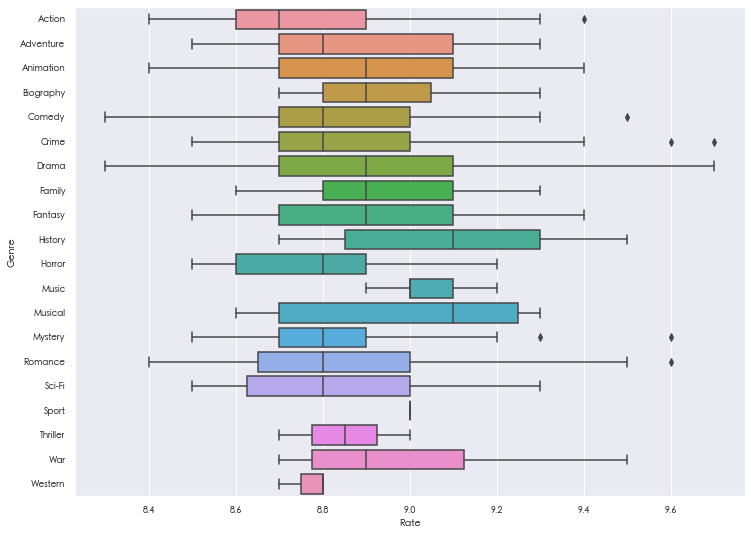

In [15]:
# Douban movie rate of genres
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False  
sns.set(font='Heiti TC', font_scale=0.8) 
plt.figure(figsize = (12,9))
sns.boxplot(y='Genre',x='Rate',data=douban_tags.sort_values('Genre')[:656])
plt.show()

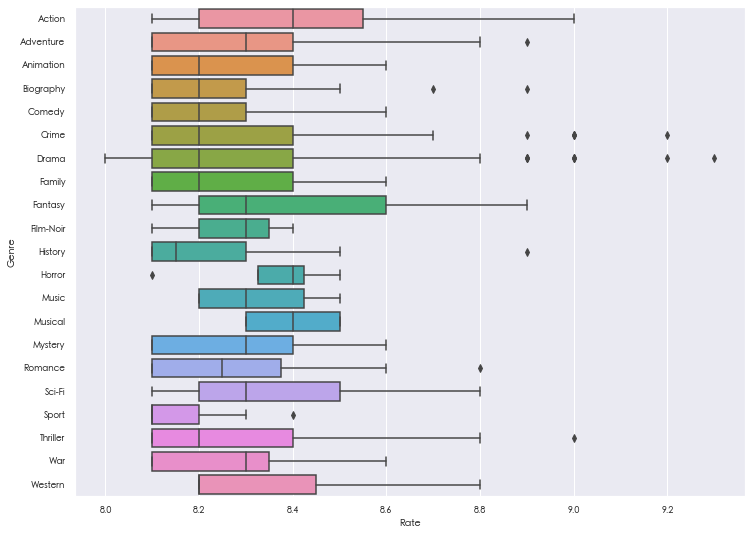

In [16]:
# imdb movie rate of genres
plt.figure(figsize = (12,9))
sns.boxplot(y='Genre',x='Rate',data=imdb_tags.sort_values('Genre'))
plt.show()

By plotting the movies' rate separately according to the genres, the audience preference of two sites can be inferred. For example, action is the favorite type in imdb with highest average rate while it's surprisingly the lowest rated type in douban. What's more, movie of history genre in imdb has lowest average rate, however in douban, history is among top 3 highly rated genres. As douban is mainly composed of users from China, a country with long and attractive history, they love and respect traditions a lot and have more calm and stable personality. The culture background influences user behavior and contributes to platform traits. It gives us an inspiration for a movie selection strategy – if you are an action movie lover, when imdb gives a movie of action genre high score and douban gives it low score, it’s probably sensible to believe in imdb and give it a try. When checking the movie rate online, looking up for two sites and give different weights of sites’ rating considering movie’s genre can help us find movies suit to our taste best. 